In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir("../input"))


['stage2_test_variants.csv', 'test_text', 'stage1_solution_filtered.csv', 'training_variants', 'training_text', 'stage2_sample_submission.csv', 'stage2_test_text.csv', 'test_variants', 'submissionFile']


In [3]:
tr_va = pd.read_csv('../input/training_variants', delimiter = ',')
engine = 'python'
tr_va.head(10) 

,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4
5,5,CBL,V391I,4
6,6,CBL,V430M,5
7,7,CBL,Deletion,1
8,8,CBL,Y371H,4
9,9,CBL,C384R,4


In [4]:
tr_text = pd.read_csv('../input/training_text', sep='\|\|' ,  skiprows =1,names =['ID','Text'])
engine = 'python'
tr_text.head(5)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,ID,Text
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


In [5]:
data = {"ID":tr_va["ID"], "gene": tr_va["Gene"], "Variation": tr_va["Variation"], "Class":tr_va.Class, "Text": tr_text["Text"]}
total = pd.DataFrame(data, columns =["ID","gene","Variation","Class","Text"])

In [6]:
total.head(5)

,ID,gene,Variation,Class,Text
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...


In [7]:
incomplete_tr_rows =[total[total.isnull().any(axis=1)]]
incomplete_tr_rows


[        ID    gene             Variation  Class Text
 1109  1109   FANCA                S1088F      1  NaN
 1277  1277  ARID5B  Truncating Mutations      1  NaN
 1407  1407   FGFR3                 K508M      6  NaN
 1639  1639    FLT1         Amplification      6  NaN
 2755  2755    BRAF                 G596C      7  NaN]

In [8]:
valid_tr_data = total.dropna()
len(valid_tr_data), len(total)

(3316, 3321)

In [9]:
valid_tr_data.Text[1]

" Abstract Background  Non-small cell lung cancer (NSCLC) is a heterogeneous group of disorders with a number of genetic and proteomic alterations. c-CBL is an E3 ubiquitin ligase and adaptor molecule important in normal homeostasis and cancer. We determined the genetic variations of c-CBL, relationship to receptor tyrosine kinases (EGFR and MET), and functionality in NSCLC.  Methods and Findings  Using archival formalin-fixed paraffin embedded (FFPE) extracted genomic DNA, we show that c-CBL mutations occur in somatic fashion for lung cancers. c-CBL mutations were not mutually exclusive of MET or EGFR mutations; however they were independent of p53 and KRAS mutations. In normal/tumor pairwise analysis, there was significant loss of heterozygosity (LOH) for the c-CBL locus (22%, n\u200a=\u200a8/37) and none of these samples revealed any mutation in the remaining copy of c-CBL. The c-CBL LOH also positively correlated with EGFR and MET mutations observed in the same samples. Using selec

In [10]:
te_var = pd.read_csv('../input/test_variants', delimiter=',')
engine = 'python'
te_var.head(5)

,ID,Gene,Variation
0,0,ACSL4,R570S
1,1,NAGLU,P521L
2,2,PAH,L333F
3,3,ING1,A148D
4,4,TMEM216,G77A


In [11]:
te_text = pd.read_csv('../input/test_text', sep='\|\|' , header = 0, skiprows =1,names =['ID','Text'])
engine = 'python'
te_text.head(5)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,ID,Text
0,1,Abstract The Large Tumor Suppressor 1 (LATS1)...
1,2,Vascular endothelial growth factor receptor (V...
2,3,Inflammatory myofibroblastic tumor (IMT) is a ...
3,4,Abstract Retinoblastoma is a pediatric retina...
4,5,The accurate determination of perfluoroalkyl s...


In [12]:
data1 = {"ID":te_var["ID"], "gene": te_var["Gene"], "Variation": te_var["Variation"], "Text": te_text["Text"]}
total_test = pd.DataFrame(data1, columns =["ID","gene","Variation","Text"])

In [13]:
total_test.head(10)

,ID,gene,Variation,Text
0,0,ACSL4,R570S,Abstract The Large Tumor Suppressor 1 (LATS1)...
1,1,NAGLU,P521L,Vascular endothelial growth factor receptor (V...
2,2,PAH,L333F,Inflammatory myofibroblastic tumor (IMT) is a ...
3,3,ING1,A148D,Abstract Retinoblastoma is a pediatric retina...
4,4,TMEM216,G77A,The accurate determination of perfluoroalkyl s...
5,5,CD40LG,A123E,Aberrations in the mTOR (mechanistic target of...
6,6,KLF11,T220M,Oncogenic mutations in the monomeric Casitas B...
7,7,SGCB,T151R,NPM1 gene at chromosome 5q35 is involved in re...
8,8,CLCF1,R197L,Introduction The epidermal growth factor recep...
9,9,SDHAF1,R55P,The protein kinase B-RAF is mutated in approxi...


In [14]:
total_test.isnull().sum()
incomplete_te_rows= total_test[total_test.isnull().any(axis=1)]
incomplete_te_rows

,ID,gene,Variation,Text
1622,1622,CYP27B1,T409I,NaN
5667,5667,DFNB59,T54I,NaN


In [15]:
valid_te_data = total_test.dropna()
len(valid_te_data), len(total_test)

(5666, 5668)

In [16]:
valid_tr_data.describe(include='all')

,ID,gene,Variation,Class,Text
count,3316.000000,3316,3316,3316.000000,3316
unique,NaN,262,2993,NaN,1920
top,NaN,BRCA1,Truncating Mutations,NaN,The PTEN (phosphatase and tensin homolog) phos...
freq,NaN,264,92,NaN,53
mean,1660.034077,NaN,NaN,4.366104,NaN
std,959.287860,NaN,NaN,2.309241,NaN
min,0.000000,NaN,NaN,1.000000,NaN
25%,828.750000,NaN,NaN,2.000000,NaN
50%,1661.500000,NaN,NaN,4.000000,NaN
75%,2490.250000,NaN,NaN,7.000000,NaN


In [17]:
valid_te_data.gene.value_counts() 

F8         134
CFTR        57
F9          54
G6PD        46
GBA         39
PAH         38
AR          38
CASR        37
ARSA        30
VWF         29
BRCA1       29
SCN4A       29
SCN5A       27
GLA         26
HPRT1       24
LDLR        24
HEXA        24
TSHR        23
LPL         23
ABCA4       22
OAT         22
TYR         22
KCNQ1       21
PTEN        20
BTK         20
BEST1       19
HMBS        19
TP53        19
PROC        18
CAV3        17
          ... 
TUBB1        1
PHF8         1
TOR1A        1
KNSTRN       1
ALG6         1
BAAT         1
CLCNKA       1
TLR2         1
NDUFV2       1
ORAI1        1
CNTNAP2      1
CLCF1        1
PRKAG3       1
EXT2         1
MASTL        1
RBBP8        1
CD207        1
CCR2         1
YAP1         1
TLR5         1
BHLHE41      1
PEX13        1
TGFBR2       1
HTRA1        1
SQSTM1       1
MRPS22       1
VPS33B       1
RFT1         1
TRAPPC2      1
ERMAP        1
Name: gene, Length: 1396, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

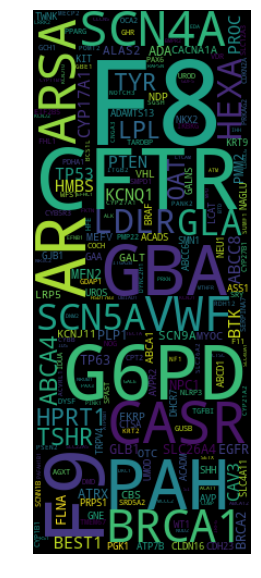

In [18]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
x=list(valid_te_data.gene)
wc=WordCloud(height=500,width =200).generate(" ".join(x))
plt.figure(figsize =(10,10))
plt.imshow(wc, interpolation= 'bilinear')
plt.axis("off")
plt.margins(x=0,y=0)
plt.show


In [19]:
 valid_tr_data.gene.value_counts()

BRCA1       264
TP53        163
EGFR        141
PTEN        126
BRCA2       125
KIT          99
BRAF         92
ERBB2        69
ALK          69
PDGFRA       60
PIK3CA       56
CDKN2A       52
FGFR2        50
FLT3         49
TSC2         47
MTOR         45
KRAS         44
MAP2K1       43
VHL          41
RET          40
FGFR3        38
MLH1         35
SMAD4        33
JAK2         33
MET          33
NOTCH1       31
AKT1         28
ROS1         26
ABL1         26
PTPN11       26
           ... 
CEBPA         1
RNF43         1
CDK8          1
ASXL2         1
PAK1          1
PPM1D         1
AXIN1         1
PAX8          1
MEN1          1
HIST1H1C      1
GNA11         1
NCOR1         1
RICTOR        1
RAD51B        1
FAM58A        1
PMS1          1
JUN           1
RAD54L        1
AURKB         1
FGF19         1
VEGFA         1
KMT2B         1
TCF7L2        1
FGF4          1
PIK3R3        1
LATS1         1
ERRFI1        1
HLA-B         1
KDM5A         1
RYBP          1
Name: gene, Length: 262,

In [20]:
sa = pd.read_csv('../input/submissionFile', delimiter = ',')
engine = 'python'
sa.head(5)

,ID,class1,class2,class3,class4,class5,class6,class7,class8,class9
0,0,0,0,0,0,0,1,0,0,0
1,1,0,1,0,0,0,0,0,0,0
2,2,0,0,0,0,0,1,0,0,0
3,3,0,0,0,0,0,0,0,1,0
4,4,0,0,0,1,0,0,0,0,0


In [21]:
valid_tr_data.head(10)
#valid_te_data.head(10)

,ID,gene,Variation,Class,Text
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...
5,5,CBL,V391I,4,Oncogenic mutations in the monomeric Casitas B...
6,6,CBL,V430M,5,Oncogenic mutations in the monomeric Casitas B...
7,7,CBL,Deletion,1,CBL is a negative regulator of activated recep...
8,8,CBL,Y371H,4,Abstract Juvenile myelomonocytic leukemia (JM...
9,9,CBL,C384R,4,Abstract Juvenile myelomonocytic leukemia (JM...


In [22]:
valid_tr_data.describe(include='all')

,ID,gene,Variation,Class,Text
count,3316.000000,3316,3316,3316.000000,3316
unique,NaN,262,2993,NaN,1920
top,NaN,BRCA1,Truncating Mutations,NaN,The PTEN (phosphatase and tensin homolog) phos...
freq,NaN,264,92,NaN,53
mean,1660.034077,NaN,NaN,4.366104,NaN
std,959.287860,NaN,NaN,2.309241,NaN
min,0.000000,NaN,NaN,1.000000,NaN
25%,828.750000,NaN,NaN,2.000000,NaN
50%,1661.500000,NaN,NaN,4.000000,NaN
75%,2490.250000,NaN,NaN,7.000000,NaN


In [23]:
a=max(valid_tr_data.gene)

In [24]:
x= valid_tr_data.loc[valid_tr_data['gene'] == 'BRCA1']

,gene,Variation
2417,BRCA1,E1735K
2418,BRCA1,R1753T
2419,BRCA1,C44Y
2420,BRCA1,R1835P
2421,BRCA1,Truncating Mutations
2422,BRCA1,G1803A
2423,BRCA1,A1830T
2424,BRCA1,G1743R
2425,BRCA1,I68K
2426,BRCA1,C64G


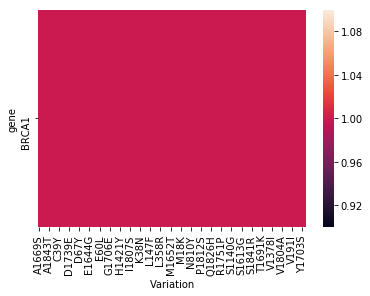

In [25]:
import seaborn as sns
sns.heatmap(pd.crosstab(x.gene, x.Variation))
x[['gene','Variation']]

In [26]:
x.Variation.describe()

count        264
unique       264
top       Q1811R
freq           1
Name: Variation, dtype: object

In [27]:
valid_tr_data.Variation.describe()

count                     3316
unique                    2993
top       Truncating Mutations
freq                        92
Name: Variation, dtype: object

In [28]:
valid_tr_data.loc[valid_tr_data['Variation'] == 'Truncating Mutations']


,ID,gene,Variation,Class,Text
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...
16,16,CBL,Truncating Mutations,1,To determine if residual cylindrical refractiv...
41,41,DICER1,Truncating Mutations,1,Mesenchymal cell populations contribute to mic...
88,88,RYBP,Truncating Mutations,1,The mouse double minute 2 (MDM2)–p53 interacti...
100,100,TGFBR2,Truncating Mutations,1,Signaling by transforming growth factor-β (TGF...
110,110,MSH6,Truncating Mutations,1,In addition to their mismatch recognition acti...
116,116,KMT2D,Truncating Mutations,1,Kabuki syndrome (KS) is a multiple congenital ...
117,117,LATS1,Truncating Mutations,4,The lats gene has been identified as a tumour ...
118,118,PBRM1,Truncating Mutations,1,Screening for tumor suppressor genes in breast...
287,287,ARID2,Truncating Mutations,1,"In eukaryotic cells, DNA is packaged into chro..."


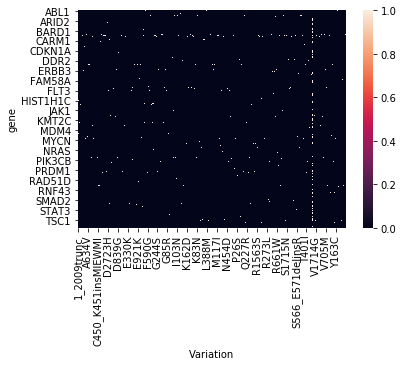

In [29]:
import seaborn as sns
sns.heatmap(pd.crosstab(valid_tr_data.gene, valid_tr_data.Variation))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fab8fb07668>,
      dtype=object)

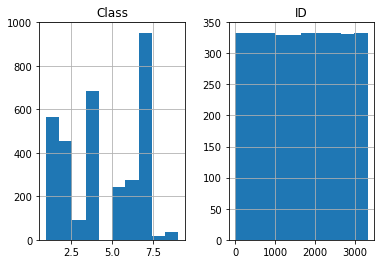

In [30]:
valid_tr_data.hist()

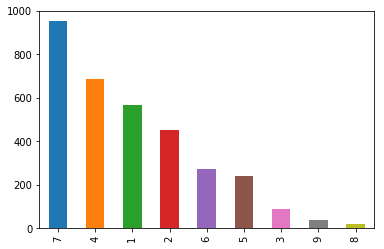

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
valid_tr_data.Class.value_counts().plot(kind= 'bar')

In [32]:
data = total.Text[:5]
data.size

5

In [33]:
import nltk
import re
from nltk.stem import PorterStemmer #stemming words
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize, sent_tokenize
from keras.preprocessing.text import one_hot
from nltk.corpus import stopwords
def clean_text(evidence):
     stop = set(stopwords.words("english"))
     normal= evidence.lower()   
     proc = re.sub(r'[\t]'," ",normal)
     proc1 = re.sub(r'\(.*?\)'," ",proc)
     proc2 = re.sub(r'[.,+*;`\')(><:/]',' ', proc1)
     tex=[]
     [tex.append(w) for w in word_tokenize(proc2) if w not in stop]
     t = " ".join(tex)
     return t
    

Using TensorFlow backend.


In [34]:
valid_tr_data.Text.size

3316

In [35]:
valid_tr_data = valid_tr_data.reset_index(drop=True)


In [36]:
valid_te_data= valid_te_data.reset_index(drop= True)

In [37]:
clean_train_text=[]
for i in range (valid_tr_data.Text.size):
    clean_train_text.append(clean_text(valid_tr_data.Text[i]))

In [38]:
clean_test_text=[]
for i in range(valid_te_data.Text.size):
    clean_test_text.append(clean_text(valid_te_data.Text[i]))

In [39]:
len(clean_test_text), len(valid_te_data.Text)

(5666, 5666)

In [40]:
vocab_size =10000 
from keras.preprocessing.text import one_hot
inp_int_cod=[one_hot(txt,vocab_size) for txt in clean_train_text]
test_int_cod = [one_hot(txt, vocab_size)for txt in clean_test_text]
#print(inp_int_cod)

In [41]:
len(clean_train_text), len(clean_test_text)

(3316, 5666)

In [42]:
padding_size =4000
from keras.preprocessing.sequence import pad_sequences
inp_pad = pad_sequences(inp_int_cod, maxlen=padding_size)

In [43]:
padding_size =4000
from keras.preprocessing.sequence import pad_sequences
test_inp_pad = pad_sequences(test_int_cod, maxlen=padding_size)

In [44]:
inp_pad.shape

(3316, 4000)

In [45]:
from sklearn.preprocessing import LabelEncoder
genelb = LabelEncoder()
glb=genelb.fit_transform(valid_tr_data.gene)
genelb.inverse_transform(glb)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['FAM58A', 'CBL', 'CBL', ..., 'RUNX1', 'RUNX1', 'RUNX1'],
      dtype=object)

In [46]:
from sklearn.preprocessing import LabelEncoder
varlb = LabelEncoder()
vlb=varlb.fit_transform(valid_tr_data.Variation)
varlb.inverse_transform(vlb)
#vlb[1:10]

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['Truncating Mutations', 'W802*', 'Q249E', ..., 'Fusions', 'R80C',
       'K83E'], dtype=object)

In [47]:
glb= np.array(glb).reshape((-1,1))
vlb= np.array(vlb).reshape((-1,1))

In [48]:
glb,vlb

(array([[ 84],
        [ 38],
        [ 38],
        ...,
        [219],
        [219],
        [219]]), array([[2626],
        [2853],
        [1895],
        ...,
        [ 807],
        [2247],
        [1331]]))

In [49]:
merge_input= np.hstack((glb,vlb, inp_pad))

In [50]:
merge_input.shape

(3316, 4002)

In [51]:
#merge_input= merge_input.reshape((2,3316,1))

In [52]:
merge_input.shape

(3316, 4002)

In [53]:
valid_tr_data.Class.unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [54]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
lb_cat = LabelEncoder()
lb_cat=lb_cat.fit_transform(valid_tr_data.Class)
#lb_cat = np_utils.to_categorical(llb,num_classes=9)


In [55]:
type(lb_cat), type(total)

(numpy.ndarray, pandas.core.frame.DataFrame)

In [56]:
lb_cat.shape, merge_input.shape

((3316,), (3316, 4002))

In [57]:
type(merge_input), type(lb_cat), 

(numpy.ndarray, numpy.ndarray)

In [58]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
from sklearn.model_selection import train_test_split
tr_t,va_t,tr_l,va_l = train_test_split(merge_input,valid_tr_data.Class, test_size=0.02, random_state=42)


In [59]:
tr_t.shape, tr_l.shape

((3249, 4002), (3249,))

In [60]:
clsf = MultinomialNB()
clsf.fit(tr_t,tr_l)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [61]:
dclf = tree.DecisionTreeClassifier()
dclf.fit(tr_t,tr_l)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [62]:
valid_te_data.head(10)

,ID,gene,Variation,Text
0,0,ACSL4,R570S,Abstract The Large Tumor Suppressor 1 (LATS1)...
1,1,NAGLU,P521L,Vascular endothelial growth factor receptor (V...
2,2,PAH,L333F,Inflammatory myofibroblastic tumor (IMT) is a ...
3,3,ING1,A148D,Abstract Retinoblastoma is a pediatric retina...
4,4,TMEM216,G77A,The accurate determination of perfluoroalkyl s...
5,5,CD40LG,A123E,Aberrations in the mTOR (mechanistic target of...
6,6,KLF11,T220M,Oncogenic mutations in the monomeric Casitas B...
7,7,SGCB,T151R,NPM1 gene at chromosome 5q35 is involved in re...
8,8,CLCF1,R197L,Introduction The epidermal growth factor recep...
9,9,SDHAF1,R55P,The protein kinase B-RAF is mutated in approxi...


In [63]:
from sklearn.preprocessing import LabelEncoder
x= LabelEncoder()
lge=x.fit_transform(valid_te_data.gene)

In [64]:
from sklearn.preprocessing import LabelEncoder
y= LabelEncoder()
lva=y.fit_transform(valid_te_data.Variation)

In [65]:
lge= np.array(lge).reshape((-1,1))
lva= np.array(lva).reshape((-1,1))

In [66]:
merge_test= np.hstack((lge,lva, test_inp_pad))

In [67]:
test_inp_pad.shape, merge_test.shape, merge_input.shape

((5666, 4000), (5666, 4002), (3316, 4002))

In [68]:
valid_tr_data.head(10)

,ID,gene,Variation,Class,Text
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...
5,5,CBL,V391I,4,Oncogenic mutations in the monomeric Casitas B...
6,6,CBL,V430M,5,Oncogenic mutations in the monomeric Casitas B...
7,7,CBL,Deletion,1,CBL is a negative regulator of activated recep...
8,8,CBL,Y371H,4,Abstract Juvenile myelomonocytic leukemia (JM...
9,9,CBL,C384R,4,Abstract Juvenile myelomonocytic leukemia (JM...


In [69]:
pr = clsf.predict(va_t)

In [70]:
da ={'actual_class':va_l, 'predicted_class':pr}
tab = pd.DataFrame(da )


In [71]:
tab

,actual_class,predicted_class
2159,4,7
1962,7,7
240,7,7
2554,5,7
1626,4,4
3070,7,7
527,4,7
2354,4,7
3305,7,7
1929,6,7


In [72]:
dval_p = dclf.predict(va_t)

In [73]:
d1 ={'actual_class':va_l, 'predicted_class':dval_p}
tab1 = pd.DataFrame(d1 )
tab1

,actual_class,predicted_class
2159,4,4
1962,7,1
240,7,7
2554,5,5
1626,4,1
3070,7,7
527,4,1
2354,4,4
3305,7,2
1929,6,5


In [74]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
print(accuracy_score(va_l, dval_p)*100)
print(confusion_matrix(va_l, dval_p))
print(classification_report(va_l, dval_p))

59.70149253731343
[[ 4  1  0  0  1  1  0]
 [ 1  4  0  0  0  3  0]
 [ 5  0 12  1  0  0  0]
 [ 2  0  1  1  1  1  0]
 [ 0  0  0  3  1  0  0]
 [ 3  2  1  0  0 17  0]
 [ 0  0  0  0  0  0  1]]
             precision    recall  f1-score   support

          1       0.27      0.57      0.36         7
          2       0.57      0.50      0.53         8
          4       0.86      0.67      0.75        18
          5       0.20      0.17      0.18         6
          6       0.33      0.25      0.29         4
          7       0.77      0.74      0.76        23
          9       1.00      1.00      1.00         1

avg / total       0.64      0.60      0.61        67



In [75]:
prediction1 = dclf.predict(merge_test)
valid_te_data['Class']= prediction1
valid_te_data.head(10)


,ID,gene,Variation,Text,Class
0,0,ACSL4,R570S,Abstract The Large Tumor Suppressor 1 (LATS1)...,1
1,1,NAGLU,P521L,Vascular endothelial growth factor receptor (V...,4
2,2,PAH,L333F,Inflammatory myofibroblastic tumor (IMT) is a ...,1
3,3,ING1,A148D,Abstract Retinoblastoma is a pediatric retina...,1
4,4,TMEM216,G77A,The accurate determination of perfluoroalkyl s...,4
5,5,CD40LG,A123E,Aberrations in the mTOR (mechanistic target of...,2
6,6,KLF11,T220M,Oncogenic mutations in the monomeric Casitas B...,1
7,7,SGCB,T151R,NPM1 gene at chromosome 5q35 is involved in re...,1
8,8,CLCF1,R197L,Introduction The epidermal growth factor recep...,4
9,9,SDHAF1,R55P,The protein kinase B-RAF is mutated in approxi...,1


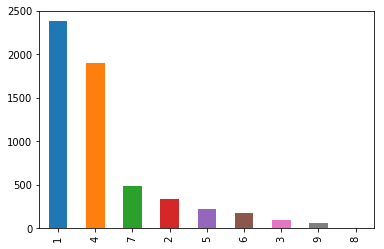

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline
valid_te_data.Class.value_counts().plot(kind= 'bar')

In [77]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
print(accuracy_score(va_l, pr)*100)
print(confusion_matrix(va_l, pr))
print(classification_report(va_l, pr))

40.298507462686565
[[ 0  0  2  0  2  0  3  0]
 [ 0  2  2  0  0  0  4  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  2  4  5  0  1  6  0]
 [ 0  0  0  0  2  0  4  0]
 [ 0  0  1  0  0  1  2  0]
 [ 0  0  7  0  0  0 16  0]
 [ 0  0  0  0  0  0  0  1]]
             precision    recall  f1-score   support

          1       0.00      0.00      0.00         7
          2       0.50      0.25      0.33         8
          3       0.00      0.00      0.00         0
          4       1.00      0.28      0.43        18
          5       0.50      0.33      0.40         6
          6       0.50      0.25      0.33         4
          7       0.46      0.70      0.55        23
          9       1.00      1.00      1.00         1

avg / total       0.57      0.40      0.42        67



/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [78]:
prediction = clsf.predict(merge_test)
valid_te_data['Class']= prediction
valid_te_data.head(10)

,ID,gene,Variation,Text,Class
0,0,ACSL4,R570S,Abstract The Large Tumor Suppressor 1 (LATS1)...,3
1,1,NAGLU,P521L,Vascular endothelial growth factor receptor (V...,7
2,2,PAH,L333F,Inflammatory myofibroblastic tumor (IMT) is a ...,7
3,3,ING1,A148D,Abstract Retinoblastoma is a pediatric retina...,7
4,4,TMEM216,G77A,The accurate determination of perfluoroalkyl s...,3
5,5,CD40LG,A123E,Aberrations in the mTOR (mechanistic target of...,4
6,6,KLF11,T220M,Oncogenic mutations in the monomeric Casitas B...,7
7,7,SGCB,T151R,NPM1 gene at chromosome 5q35 is involved in re...,3
8,8,CLCF1,R197L,Introduction The epidermal growth factor recep...,7
9,9,SDHAF1,R55P,The protein kinase B-RAF is mutated in approxi...,7


In [79]:
from sklearn import tree
tr = tree.DecisionTreeRegressor()
tr_r = tr.fit(tr_t,tr_l)

In [80]:
val_tr = tr.predict(va_t)
val_tr
print(accuracy_score(va_l, val_tr)*100)
print(confusion_matrix(va_l, val_tr))
print(classification_report(va_l, val_tr))

61.19402985074627
[[ 5  0  0  1  0  1  0]
 [ 1  3  1  0  2  1  0]
 [ 4  1 11  1  0  1  0]
 [ 2  1  1  1  0  1  0]
 [ 1  0  0  2  1  0  0]
 [ 0  3  1  0  0 19  0]
 [ 0  0  0  0  0  0  1]]
             precision    recall  f1-score   support

          1       0.38      0.71      0.50         7
          2       0.38      0.38      0.38         8
          4       0.79      0.61      0.69        18
          5       0.20      0.17      0.18         6
          6       0.33      0.25      0.29         4
          7       0.83      0.83      0.83        23
          9       1.00      1.00      1.00         1

avg / total       0.63      0.61      0.61        67



In [81]:
trreg= tr.predict(merge_test)
valid_te_data['Class']= trreg
valid_te_data.head(10)
trreg[1:10]

array([4., 1., 4., 4., 4., 1., 6., 1., 1.])

In [82]:
tr_t.shape, tr_l.shape

((3249, 4002), (3249,))

In [83]:
from sklearn import svm
sv = svm.SVC()
dta = sv.fit(tr_t,tr_l)


In [84]:
v_tr = dta.predict(va_t)
v_tr
print(accuracy_score(va_l, v_tr)*100)
print(confusion_matrix(va_l, v_tr))
print(classification_report(va_l, v_tr))


47.76119402985074
[[ 1  0  0  1  0  5  0]
 [ 0  2  0  0  0  6  0]
 [ 1  0  5  0  0 12  0]
 [ 1  0  0  0  0  5  0]
 [ 0  0  0  1  1  2  0]
 [ 0  0  0  0  0 23  0]
 [ 0  0  0  0  0  1  0]]
             precision    recall  f1-score   support

          1       0.33      0.14      0.20         7
          2       1.00      0.25      0.40         8
          4       1.00      0.28      0.43        18
          5       0.00      0.00      0.00         6
          6       1.00      0.25      0.40         4
          7       0.43      1.00      0.60        23
          9       0.00      0.00      0.00         1

avg / total       0.63      0.48      0.41        67



In [85]:
svccl= dta.predict(merge_test)
valid_te_data['Class']= svccl
valid_te_data.head(100)
valid_te_data.Class.value_counts()


7    5664
1       2
Name: Class, dtype: int64

In [86]:
from sklearn.ensemble import RandomForestRegressor 
rf = RandomForestRegressor(n_estimators=1000, oob_score=True, random_state=123456)
rf.fit(tr_t,tr_l)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=True, random_state=123456, verbose=0,
           warm_start=False)

In [ ]:
rff =rf.predict(va_t)
print(accuracy_score(va_l, rff)*100)
print(confusion_matrix(va_l, rff))
print(classification_report(va_l, rff))

In [ ]:
rff